# **Deep Learning with Python in TensorFlow (Computer Vision)** 

## **Written by:** Aarish Khan

## **Date:** 3 January 2024

In [ ]:
# incase you have not installed it:
# pip install tensorflow

In [1]:
# importing the necessary libraries 
import tensorflow as tf 
# checking out the version of tensorflow
print(tf.__version__)


2.15.0


In [4]:
# load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [5]:
# Selecting the images and labels for training and testing
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


LABEL: 4

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   8  80 149 190 174 194 190 174 184 128  44   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   5   0  24 219 227 172 216 214 198 201 217 208 171 206 165   0   0   1   0   0   0   0   0]
 [  0   0   0   0   1   0   0 110 183 133 124 224 224 191 219 255 204 139 150 198  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 120 137 138 136 104 166 248 230 243 246 106 127 129 133 146  88   0   0   0   0   0   0]
 [  0   0   0   0   0  31 141 107 129 143 166 130 224 255 253 199 151 186 129 113  90 150  20   0   0   0   0   0]
 [  0   0   0   0   0  83 117  97  90 119 163 114 190 235 225 176 116 175  99  99 101 118  83   0   0   0   0   0]
 [  0   0   0   0   0  99 116 101  97 119 123  77  87 157 139  86  78 138  97 108  98 119 108   0   0   0   0   0]
 [  0   0   0   0   0 110 116 103  91 122 124 102 

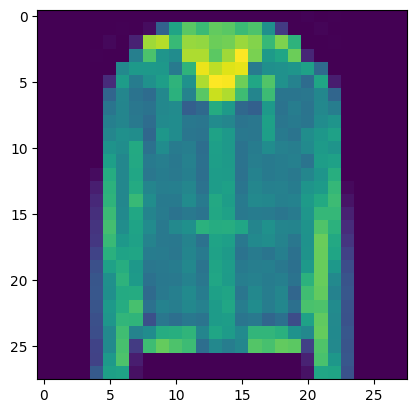

In [26]:
# import necessary library
import numpy as np 
import matplotlib.pyplot as plt 

# here you can put the value from 0 to 59999
index = 28

# here you can set the number of characters per row
np.set_printoptions(linewidth=160)

# print label and image
print(f'LABEL: {training_labels[index]}')

# \n before "IMAGE PIXEL ARRAY:" creates a blank line before the text "IMAGE PIXEL ARRAY:"
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# visualzing the image
plt.imshow(training_images[index])

In [27]:
# Normalize the pixel values of the test and train images (0 to 1 ranged)
training_images = training_images / 255.0
test_images = test_images / 255.0

In [30]:
# Building the classifiction model
# the sequential function is used to create a sequence of models.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    # inside of the keras functions there is a function called Dense, we can change the density. nn stands for neural network.
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    # there are two types of activation functions, the first is relu(rectified linear unit) and softmax.
                                                          tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [31]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [32]:
# the compile function allows us to configure our model for training. It configues the optimizer, loss function and metrics.
model.compile(optimizer = tf.optimizers.Adam(), # The adam optimizer is a popular algorithm, its used to adjust the weights of the model during training.
              loss = 'sparse_categorical_crossentropy',
              # the loss function tells us how our model is performing.
              metrics=['accuracy']) # the metrics function specifies that the model's performance will be based on accuracy.

model.fit(training_images, training_labels, epochs=5) # the epocs function is like a loop.

Epoch 1/5


1875/1875 [==============================] - 9s 4ms/step - loss: 0.5006 - accuracy: 0.8219
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3747 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3370 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3127 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2944 - accuracy: 0.8914


In [33]:
# Evaluate the model on unseen data
# the evaluate function is stored in a ml library tensorflow.
model.evaluate(test_images, test_labels) # the model will make predictions on these test images and labels.

313/313 [==============================] - 2s 4ms/step - loss: 0.3466 - accuracy: 0.8726


[0.3466489315032959, 0.8726000189781189]